In [1]:
# A
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/aula 23.09'

Mounted at /content/drive


In [3]:
# A
# Carregando o dataset de exemplo
df = pd.read_csv(path+'/boardgame-geek-dataset_organized.csv')

# Exibindo as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\n" + "="*50)
print("Informações gerais do dataset:")
print(df.info())

print("\n" + "="*50)
print("Dimensões do dataset:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

Primeiras 5 linhas do dataset:
   row_id                          boardgame  release_year  min_players  \
0       1                  Brass: Birmingham          2018            2   
1       2          Pandemic Legacy: Season 1          2015            2   
2       3                           Ark Nova          2021            1   
3       4                         Gloomhaven          2017            1   
4       5  Twilight Imperium: Fourth Edition          2017            3   

   max_players  min_playtime  max_playtime  minimum_age  avg_rating  \
0            4            60           120           14       8.575   
1            4            60            60           13       8.512   
2            4            90           150           14       8.539   
3            4            60           120           14       8.557   
4            6           240           480           14       8.572   

   num_ratings  ...  rank_strategy  rank_thematic  rank_family  rank_war  \
0        53548 

In [4]:
# A
#Informações gerais
print(df.info())
# Identificando dados ausentes
print(df.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [5]:
# A
# Estatísticas descritivas básicas
print("Estatísticas descritivas para variáveis numéricas:")
print(df.describe(percentiles=None, include=None, exclude=None))

Estatísticas descritivas para variáveis numéricas:
            row_id  release_year  min_players  max_players  min_playtime  \
count  2000.000000   2000.000000  2000.000000  2000.000000   2000.000000   
mean   1000.500000   2010.398500     1.764000     4.944000     57.519000   
std     577.494589     80.765724     0.708911     6.112655     48.646129   
min       1.000000      0.000000     1.000000     1.000000      0.000000   
25%     500.750000   2011.000000     1.000000     4.000000     30.000000   
50%    1000.500000   2017.000000     2.000000     4.000000     45.000000   
75%    1500.250000   2020.000000     2.000000     5.000000     60.000000   
max    2000.000000   2025.000000     8.000000   100.000000    480.000000   

       max_playtime  minimum_age   avg_rating    num_ratings   complexity  \
count   2000.000000  2000.000000  2000.000000    2000.000000  2000.000000   
mean      88.699000    11.342500     7.420455    9244.914000     2.537535   
std       89.119614     2.424486 

In [6]:
# A
# Calculando media de pontos
if 'rating_9' in df.columns:
    ponto = df['rating_9'].dropna()
    print(f"Média dos pontos: {ponto.mean():.2f}")

# Desvio padrao
if 'max_playtime' in df.columns:
    tempo = df['max_playtime'].dropna()
    print(f"Média do tempo: {tempo.mean():.2f}")
    print(f"Desvio Padrão do tempo: {tempo.std():.2f}")

#Verificando valores nulos
df.isnull().sum()
print('Dependendo dos valores nulos, sim, poderá afetar analises futuras. Quando os dados pegam uma pequena porcentagem das colunas, poderá não afetar tanto, mas quando a porcentagem é muito grande, afetará com dificuldade na leitura dos graficos futuros')

Média dos pontos: 1466.40
Média do tempo: 88.70
Desvio Padrão do tempo: 89.12
Dependendo dos valores nulos, sim, poderá afetar analises futuras. Quando os dados pegam uma pequena porcentagem das colunas, poderá não afetar tanto, mas quando a porcentagem é muito grande, afetará com dificuldade na leitura dos graficos futuros


In [7]:
# B
#valores nulos da coluna "average_rating"
print(df['avg_rating'].isnull().sum())
print("Não tem valores nulos ")

0
Não tem valores nulos 


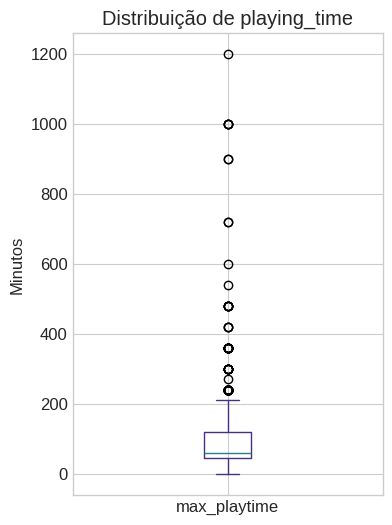

In [8]:
# B
#usando o bloxpot
df['max_playtime'].plot(kind='box', figsize=(4,6), title='Distribuição de playing_time')
plt.ylabel("Minutos")
plt.show()

In [9]:
# B
# Calculando IQR
# Quartis
Q1 = df['max_playtime'].quantile(0.25)
Q3 = df['max_playtime'].quantile(0.75)

# Intervalo interquartil
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
outliers = df[(df['max_playtime'] < limite_inferior) | (df['max_playtime'] > limite_superior)]

# Quantidade de outliers
qtd_outliers = outliers.shape[0]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)
print("Quantidade de outliers:", qtd_outliers)


Q1: 45.0
Q3: 120.0
IQR: 75.0
Limite inferior: -67.5
Limite superior: 232.5
Quantidade de outliers: 108


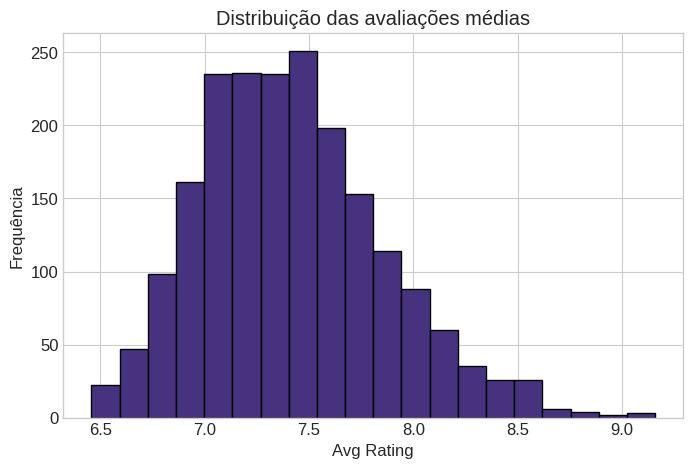

In [10]:
# C
# Histograma da coluna 'average_rating'
df['avg_rating'].plot(kind='hist', bins=20, edgecolor='black', figsize=(8,5), title='Distribuição das avaliações médias')
plt.xlabel("Avg Rating")
plt.ylabel("Frequência")
plt.show()

In [11]:
# C
print("A distribuição não é simetrica ")

A distribuição não é simetrica 


In [12]:
# C
#transformação logaritima
df["max_playtime_log10"] = np.log10(df["max_playtime"])
print(df[["max_playtime", "max_playtime_log10"]])

      max_playtime  max_playtime_log10
0              120            2.079181
1               60            1.778151
2              150            2.176091
3              120            2.079181
4              480            2.681241
...            ...                 ...
1995            75            1.875061
1996           300            2.477121
1997            30            1.477121
1998          1200            3.079181
1999            45            1.653213

[2000 rows x 2 columns]


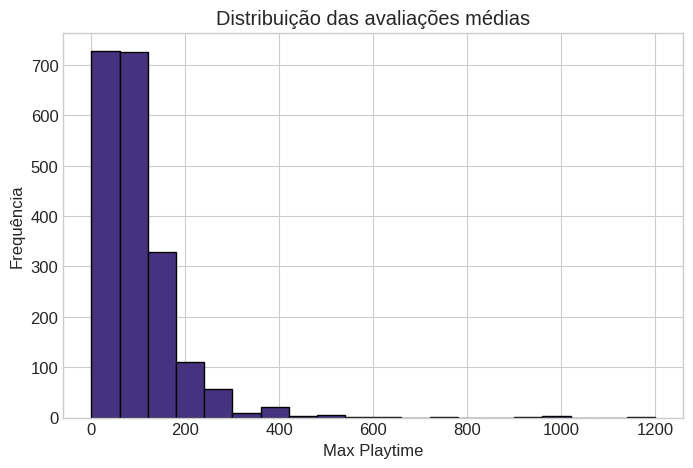

In [13]:
# C
# Histograma da coluna 'average_rating'
df['max_playtime'].plot(kind='hist', bins=20, edgecolor='black', figsize=(8,5), title='Distribuição das avaliações médias')
plt.xlabel("Max Playtime")
plt.ylabel("Frequência")
plt.show()

<Axes: xlabel='min_players', ylabel='max_players'>

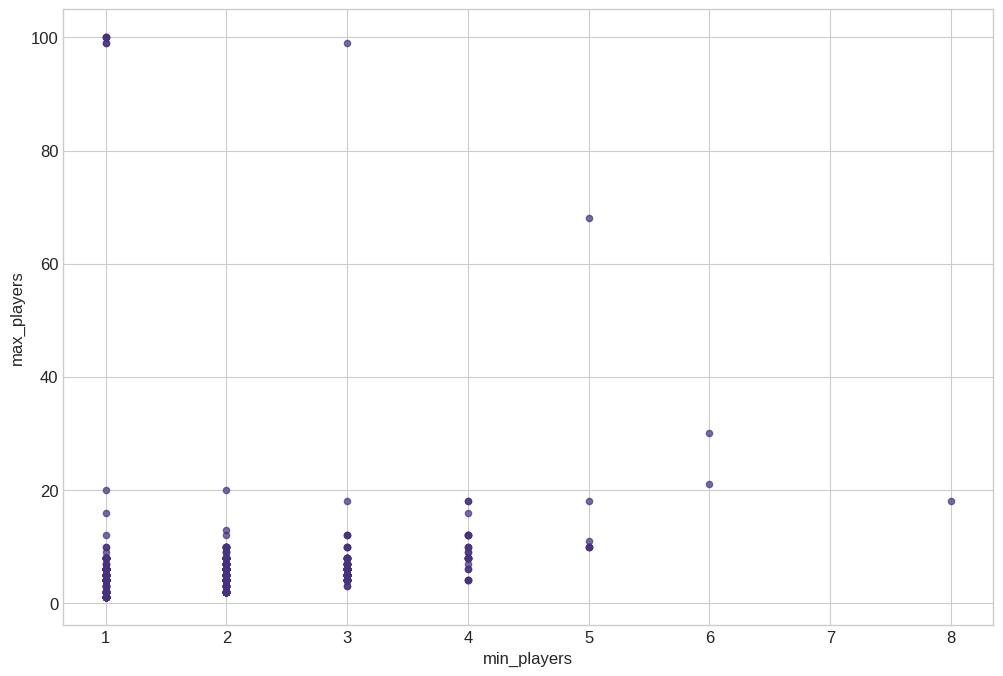

In [15]:
# D
# Grafico de dispersão
df.plot.scatter(x="min_players", y="max_players", alpha=0.7)

In [16]:
# D
#identificação
print("há uma tendência positiva, mas fraca, com muitos outliers (valores fora do padrão esperado).")

há uma tendência positiva, mas fraca, com muitos outliers (valores fora do padrão esperado).


In [18]:
# D
#Matriz de correlação

df_num = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr()
print(corr_matrix)

                      row_id  release_year  min_players  max_players  \
row_id              1.000000     -0.014429     0.043090     0.005884   
release_year       -0.014429      1.000000    -0.068804    -0.181897   
min_players         0.043090     -0.068804     1.000000     0.098884   
max_players         0.005884     -0.181897     0.098884     1.000000   
min_playtime       -0.037907      0.005583     0.021599    -0.039336   
max_playtime       -0.060282      0.003039    -0.104290    -0.038726   
minimum_age        -0.179940      0.119558    -0.141552    -0.097742   
avg_rating         -0.477495      0.060397    -0.254746    -0.044696   
num_ratings        -0.509106     -0.030488     0.076977     0.035725   
complexity         -0.222102      0.004491    -0.231912    -0.116246   
rank_overall        0.999998     -0.014435     0.043144     0.005868   
owned              -0.487035     -0.021210     0.049335     0.035908   
wishlisted         -0.645814      0.033893    -0.074385     0.00

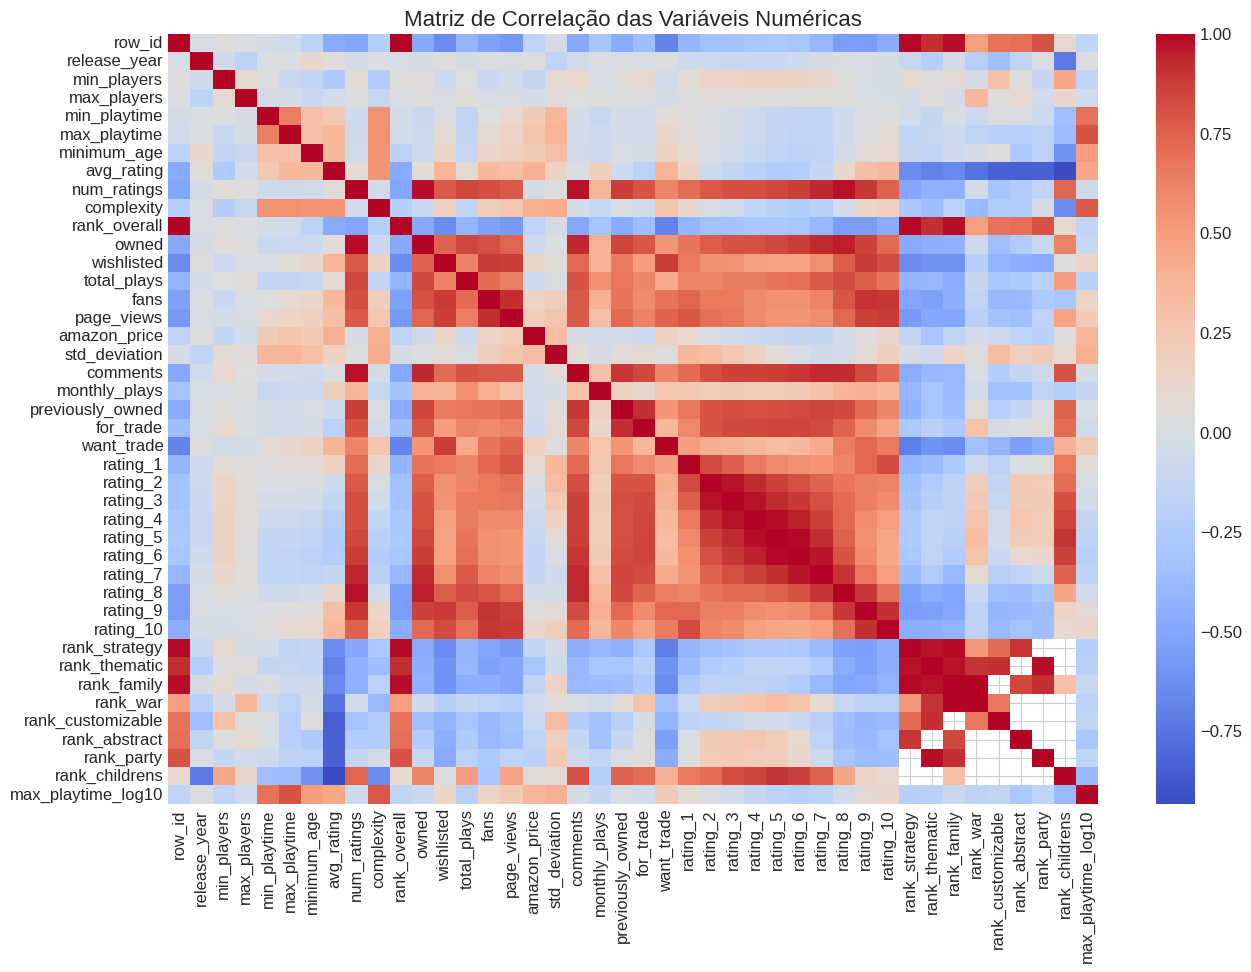

In [19]:
# D
#mapa de calor
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()

In [22]:
# D
# O par que mais possui correlação positiva é o "min_playtime" e o "max_playtime" pelo fato do tempo minimo e maximo crescerem juntos
# E o par com correlação mais proxima a zero é "release_year" e "rating_10" pois não existe relação entre o ano de lançamento e as notas que recebeu

In [21]:
# E
# A coluna que representa a data de publicação do jogo é "release_year"

# nova tabela decada
df['Decada'] = (df['release_year'] // 10) * 10

print(df[['release_year', 'Decada']].head())

   release_year  Decada
0          2018    2010
1          2015    2010
2          2021    2020
3          2017    2010
4          2017    2010


In [24]:
# E
# Contagem de jogos a cada década
jogos_decada = df.groupby('Decada').size().reset_index(name='Todos_Jogos')

print(jogos_decada)


    Decada  Todos_Jogos
0        0            3
1     1470            1
2     1580            1
3     1630            1
4     1800            1
5     1810            1
6     1850            1
7     1870            1
8     1920            1
9     1950            1
10    1960            2
11    1970            9
12    1980           25
13    1990           74
14    2000          280
15    2010         1031
16    2020          567


In [26]:
# E
# Decada com mais lançamentos
decada_top = jogos_decada.loc[jogos_decada['Todos_Jogos'].idxmax()]

print(f"Década com mais lançamentos: {decada_top['Decada']} "
      f"com {decada_top['Todos_Jogos']} jogos")


Década com mais lançamentos: 2010 com 1031 jogos


In [28]:
# -----------------------------------------------
# A década com o maior número de lançamentos foi a de 2010,
# com 1031 jogos publicados.
# -----------------------------------------------
